In [62]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from ToolBox import Tools
sns.set_style('darkgrid')

TypeError: Tools.PlotCategoricalFrequency() missing 10 required positional arguments: 'data', 'title', 'color1', 'color2', 'subtitle1', 'ytitle1', 'xlabel1', 'subtitle2', 'ytitle2', and 'xlabel2'

In [2]:
user_reviews = pd.read_parquet(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos Individuales\Machine Learning Operations\Datasets\user_reviews.parquet")

user_reviews.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2
1,76561197970982479,2011-07-15,22200,True,1
2,76561197970982479,2011-04-21,43110,True,2
3,js41637,2014-06-24,251610,True,1
4,js41637,2013-09-08,227300,True,1


In [14]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48694 entries, 0 to 48693
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             48694 non-null  object        
 1   posted              48694 non-null  datetime64[ns]
 2   item_id             48694 non-null  int64         
 3   recommend           48694 non-null  bool          
 4   sentiment_analysis  48694 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 1.5+ MB


## **`Duplicados`**

In [3]:
user_reviews[user_reviews.duplicated()==True]

,user_id,posted,item_id,recommend,sentiment_analysis
856,bokkkbokkk,2015-09-24,346110,True,2
2246,ImSeriouss,2014-01-10,218620,True,2
2247,ImSeriouss,2014-01-10,105600,True,2
2248,ImSeriouss,2014-12-17,570,True,1
2249,ImSeriouss,2014-01-13,211820,True,2
...,...,...,...,...,...
34886,yolofaceguy,2014-10-31,250320,True,1
35106,76561198075591109,2013-12-26,242570,True,2
35474,76561198092022514,2014-08-17,261820,True,1
35475,76561198092022514,2014-02-17,224260,True,1


## **`Nulos`**

In [4]:
user_reviews.isna().value_counts()

user_id  posted  item_id  recommend  sentiment_analysis
False    False   False    False      False                 48694
Name: count, dtype: int64

## **`Análisis Univariable`**

In [5]:
user_reviews.columns

Index(['user_id', 'posted', 'item_id', 'recommend', 'sentiment_analysis'], dtype='object')

### **`User ID`**

In [6]:
int(user_reviews['user_id'].nunique()/user_reviews.shape[0] * 100)

46

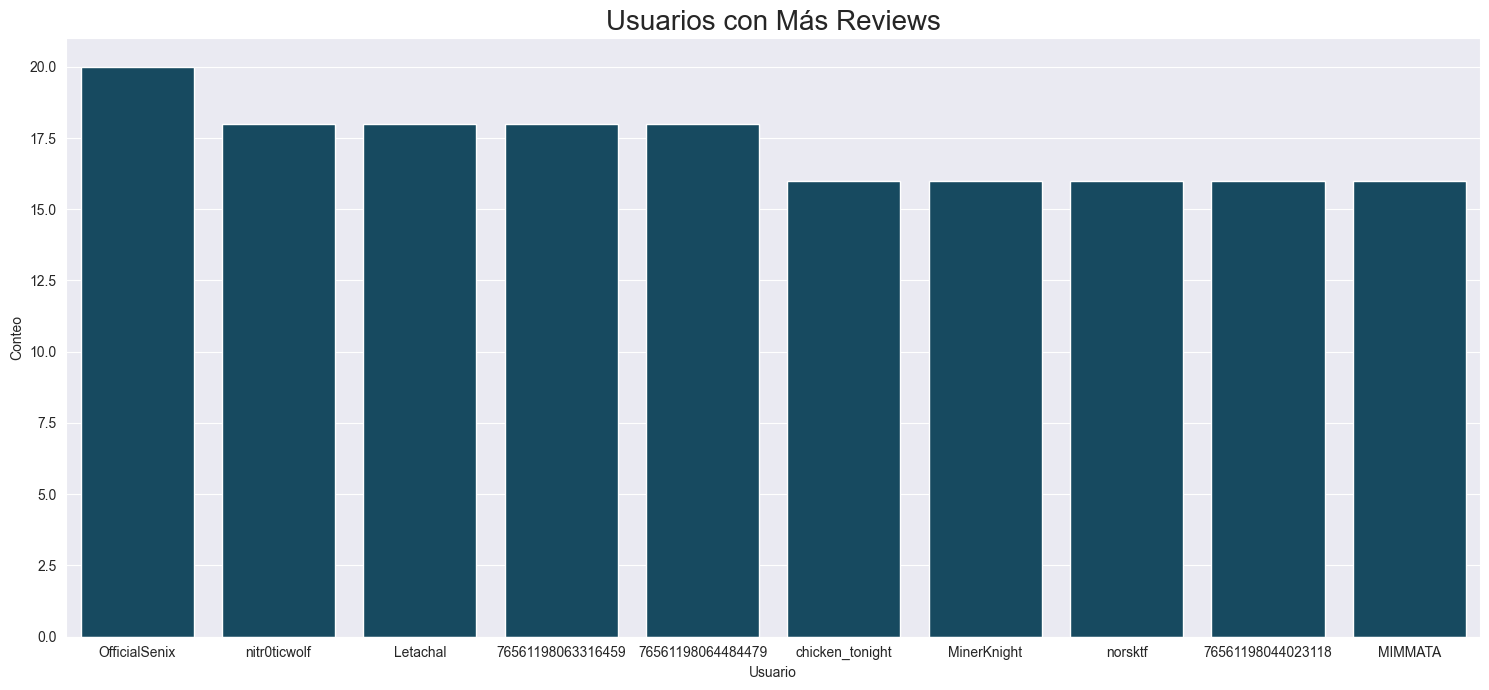

In [12]:
user_id = user_reviews['user_id'].value_counts()

plt.figure(figsize=(15,7))

sns.barplot(x=user_id.index[:10], y=user_id[:10], color="#0B4F6C")

plt.title("Usuarios con Más Reviews", fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Usuario")
plt.tight_layout()
plt.show()

### **`Fecha de Posteo`**

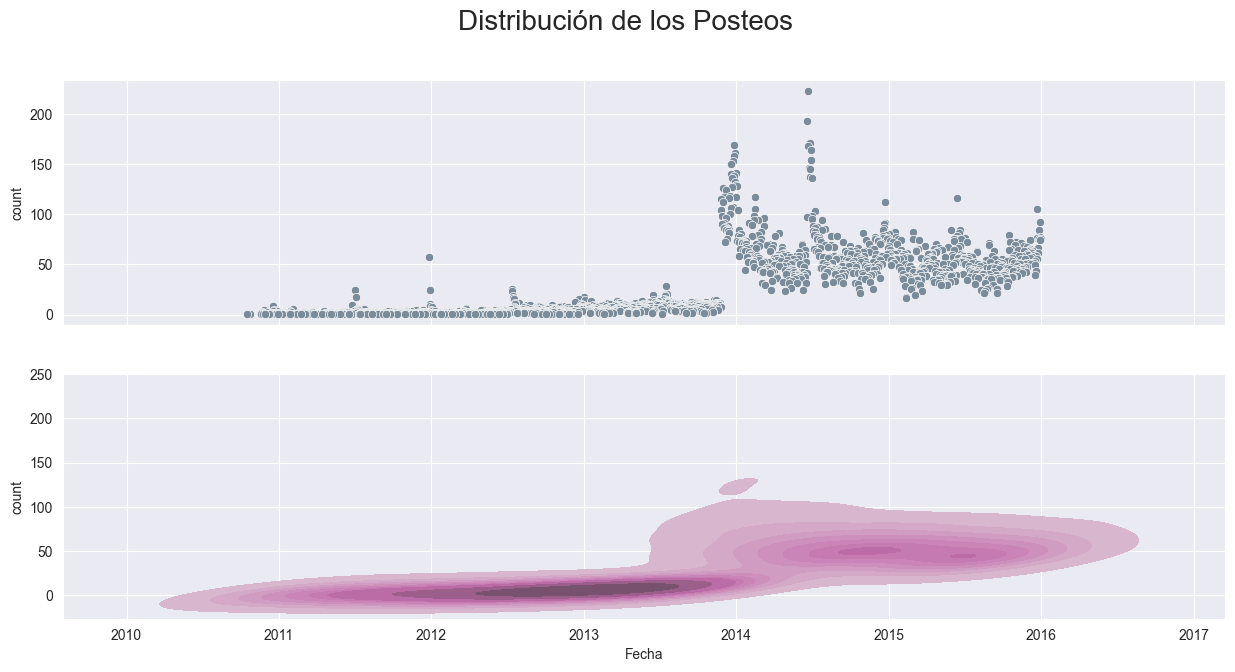

In [24]:
posted = user_reviews['posted'].value_counts()

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle("Distribución de los Posteos", fontsize=20)

sns.scatterplot(x=posted.index, y=posted, ax=ax1, color="#7A8B99")

sns.kdeplot(x=posted.index, y=posted, fill=True, ax=ax2, color="#D8A7CA")
ax2.set_xlabel("Fecha")

plt.show()

### **`Item ID`**

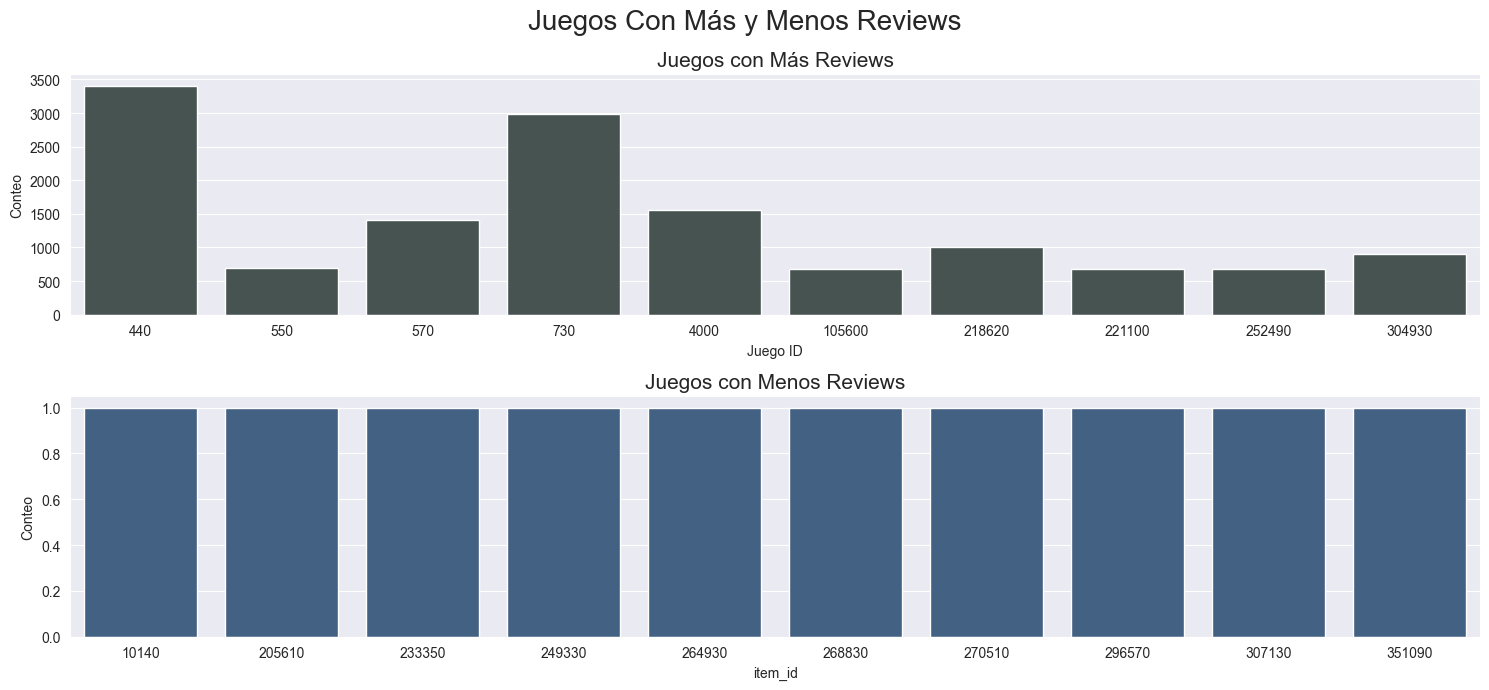

In [63]:
Tools.PlotCategoricalFrequency(user_reviews['item_id'],
                         "Juegos Con Más y Menos Reviews",
                         "#445552",
                         "#38618C",
                         "Juegos con Más Reviews", "Conteo","Juego ID", 
                         "Juegos con Menos Reviews","Conteo", "Juego ID")

### **`Recomendaciones`**

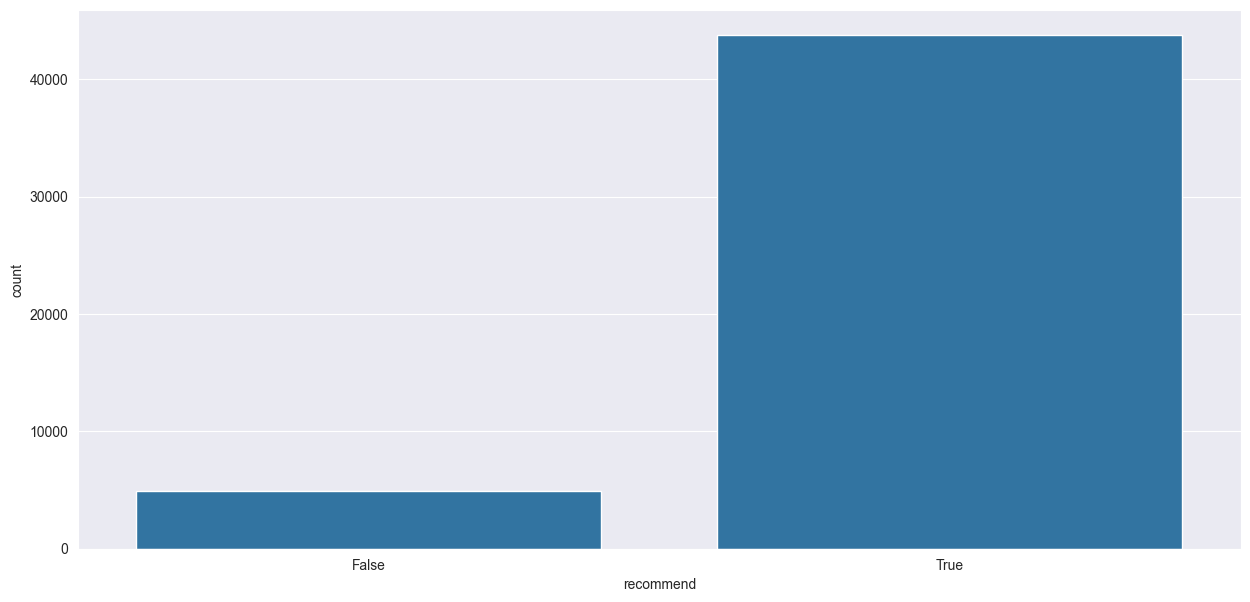

In [64]:
plt.figure(figsize=(15,7))

sns.countplot(data=user_reviews, x="recommend")

plt.show()